# Neural networks

Given an input vector of 10 numbers drawn from a sample, construct a neural network that can predict what is the last element of the input vector.

[ Modified from Michael Zingale ]

In [3]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import sys

#### Create model data to be used as the training set:  

In [4]:
# Restrict the numbers in our sample to be drawn from this set
NUM_SET = [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]

class ModelData:
    """Generate input array of length N drawing from the NUM_SET randomly.
    Then set the output to be simply the last element of the input vector
    """
    
    def __init__(self, N=10):
        self.N = N

        # our model input data
        self.x = np.random.choice(NUM_SET,size=self.N)
        
        # our scaled model output data
        self.y = np.array([self.x[-1]])

    def round_to_allowed(self, out):
        """return the number from NUM_SET that is closest to "out"  """
        return min(NUM_SET, key=lambda q:abs(q - out))

Let's create a training set with 100 input arrays and the output that we will try to predict (the last element)

In [5]:
num_training_unique = 100

train_set = []
for _ in range(num_training_unique):
    train_set.append(ModelData())

And let's have a look at the first 10 arrays:

In [6]:
for i in range(10):
    x = train_set[i].x
    y = train_set[i].y
    print(x, '-->', y)

[0.85 0.75 0.95 0.75 0.05 0.15 0.75 0.95 0.45 0.35] --> [0.35]
[0.05 0.15 0.25 0.55 0.85 0.25 0.05 0.25 0.35 0.55] --> [0.55]
[0.15 0.65 0.85 0.15 0.45 0.05 0.65 0.45 0.25 0.05] --> [0.05]
[0.65 0.95 0.05 0.35 0.95 0.35 0.55 0.35 0.25 0.05] --> [0.05]
[0.55 0.95 0.65 0.95 0.75 0.55 0.15 0.05 0.05 0.35] --> [0.35]
[0.15 0.35 0.55 0.35 0.65 0.15 0.25 0.45 0.25 0.95] --> [0.95]
[0.15 0.55 0.15 0.95 0.05 0.05 0.45 0.75 0.05 0.45] --> [0.45]
[0.75 0.75 0.25 0.25 0.95 0.75 0.45 0.65 0.45 0.25] --> [0.25]
[0.25 0.05 0.35 0.75 0.05 0.95 0.45 0.65 0.45 0.85] --> [0.85]
[0.45 0.95 0.45 0.45 0.95 0.95 0.35 0.95 0.45 0.35] --> [0.35]


#### Initialize matrix $A$

Matrix $A$ will convert the input array into the output layer. Create a matrix with the correct size and initialize it with Gaussian normal random numbers:

In [7]:
# we get the size from the length of the input and output
model = train_set[0]
m = len(model.y)
n = len(model.x)

A = np.random.normal(0.0, 1.0/np.sqrt(n), (m,n))

In [8]:
print(A)
A.shape

[[-0.10903237 -0.03441784  0.08726693 -0.44343879  0.08820358 -0.17494246
  -0.09198317 -0.05405307  0.13244281 -0.08193144]]


(1, 10)

#### Define the non-linear function that will be applied to the ouput layer to make the final prediction

In [9]:
def g(p):
    """sigmoid function"""
    alpha = 1.0
    return 1.0/(1.0 + np.exp(-alpha*p))

#### Construct the function that we want to minimize for training.  

The elements of matrix $A$ are the parameters, and we want to minimize the square error

In [10]:
# This is the "cost function"
def f_minimize(A_elements, x, y):
    
    # We will provide the elements of A as a 1D array, so we need to reshape here 
    A = A_elements.reshape((m, n))
    
    # z is the predicted ouput (y is the true value from the training set) 
    z = g(A @ x)

    return (z - y) @ (z - y)

### Train the network by minimizing the cost function 

#### Here we use `scipy.optimize` 

In [11]:
n_epochs = 100
eps = 1.e-8     # tolerance

for i in range( n_epochs*len(train_set) ):
    if i % 100 == 0:
        print('A =', A)
        
    model = np.random.choice(train_set)

    # Minimize the cost function. 
    # Matrix A was initialized with Gaussian normal random numbers
    res = optimize.minimize(f_minimize, A.flatten(),
                            args=(model.x, model.y), tol=eps)

    if not res.success:
        sys.exit("training optimization failed")

    # Update matrix A with the new "parameter values" after each iteration
    A[:,:] = res.x.reshape((len(model.y), len(model.x)))
    
    

A = [[-0.10903237 -0.03441784  0.08726693 -0.44343879  0.08820358 -0.17494246
  -0.09198317 -0.05405307  0.13244281 -0.08193144]]
A = [[-0.56361925 -0.29441165 -0.23032435 -0.77653444 -0.86950229 -0.48886381
  -0.02004198 -0.05120067 -1.29816705  5.10124884]]
A = [[-0.46848324 -0.26727176 -0.81987297  0.07610302  0.03170856 -0.50193654
  -0.25017865 -0.4526252  -0.37530694  4.94868119]]
A = [[-0.78010614 -0.350387   -0.33380051 -0.45117417 -1.00033162 -0.14329886
  -0.62223126 -0.81149475 -1.10101381  5.1614166 ]]
A = [[-1.33892654 -0.4265241  -0.50772293 -0.11101255 -0.17691669 -1.22051917
  -0.42394223 -0.34857479 -0.72093896  6.36106726]]
A = [[-0.76970019 -1.27549875 -0.91946194 -1.10921625 -0.51127135 -0.97029651
  -0.44399955  0.26550021 -0.61952487  4.94178717]]
A = [[-0.24311139 -0.30026026 -0.37897896 -0.59118641 -0.46366842 -0.21580372
  -0.94123991  0.55685057 -0.05031387  4.60165742]]
A = [[-0.51660389 -0.95863091 -0.01852013 -0.4705582  -0.12156701 -0.90258682
  -0.3459737

Once we have trained the network (i.e. determined the matrix elements), we can predict the ouput for any input array

In [12]:
def predict(model):
    """ predict the outcome using our trained matrix A """
    z = g(A @ model.x)
    return model.round_to_allowed(z)

#### Let's test the predictions on the original data used as training set

Text(0, 0.5, 'Error')

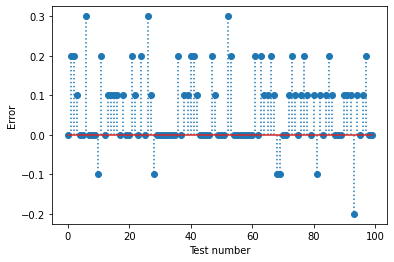

In [13]:
err = []
n_right = 0
for model in train_set:
    y_nn = predict(model)
    e = float(y_nn - model.y)
    if e == 0:
        n_right += 1
    err.append(e)
    
    #err.append(float(y_nn - model.y))

plt.clf()
markerline, stemlines, baseline = plt.stem(err, linefmt="C0:")
plt.setp(stemlines, "color", "C0")
plt.xlabel("Test number")
plt.ylabel("Error")

In [14]:
print('fraction of correct predictions = ', n_right / len(train_set))

fraction of correct predictions =  0.46


#### And now test the predictions on a new data set that has not been used for training

Text(0, 0.5, 'Error')

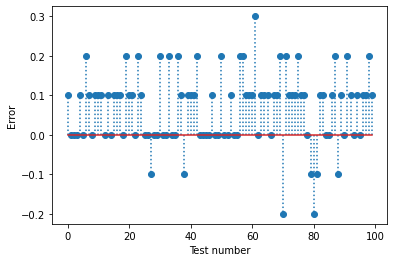

In [15]:
err = []
npts = 100
n_right = 0
for k in range(npts):
    model = ModelData()
    y_nn = predict(model)
    e = float(y_nn - model.y)
    if e == 0:
        n_right += 1
    err.append(e)

plt.clf()
markerline, stemlines, baseline = plt.stem(err, linefmt="C0:")
plt.setp(stemlines, "color", "C0")
plt.xlabel("Test number")
plt.ylabel("Error")

In [16]:
print('fraction of correct predictions = ', n_right / npts)

fraction of correct predictions =  0.35


### Train the network using gradient descent 

Here matrix A is updated by a small step each training data sample

In [17]:
n_epochs = 100
eta = 0.1  # learning rate
alpha = 1  # parameter of the sigmoid function

# Let's initialize A again
A = np.random.normal(0.0, 1.0/np.sqrt(n), (m,n))

for i in range( n_epochs*len(train_set) ):
    if i % 100 == 0:
        print('A =', A)
        
    model = np.random.choice(train_set)

    # make these column vectors
    x = model.x.reshape(n, 1)
    y = model.y.reshape(m, 1)

    b = A @ x
    z = g(b)

    A[:,:] += -eta * 2*alpha*(z - y)*z*(1 - z) @ x.T
    

A = [[ 0.42379236 -0.54430804  0.07311843 -0.17151982 -0.33865279  0.32279499
  -0.44816059  0.35588094 -0.05392213  0.17922599]]
A = [[ 0.38876965 -0.49208557  0.14762251 -0.07249217 -0.24866854  0.36558688
  -0.30944626  0.40185043  0.0231782   0.58108659]]
A = [[ 0.25354573 -0.56697058  0.02022203 -0.08451729 -0.42409633  0.25569947
  -0.33640929  0.3193122  -0.06973161  0.77521672]]
A = [[ 2.15959562e-01 -5.20020988e-01  9.27503412e-04 -7.43750243e-02
  -3.82810426e-01  2.10070318e-01 -2.88906755e-01  2.59729774e-01
  -6.85704511e-02  1.09022028e+00]]
A = [[ 0.14520241 -0.50899617 -0.04233748 -0.08872014 -0.4304481   0.13463212
  -0.27545214  0.20917191 -0.10582232  1.38336087]]
A = [[ 0.11457623 -0.55055425 -0.08093823 -0.11796856 -0.43918767  0.08375972
  -0.22322999  0.22470574 -0.08554591  1.57586357]]
A = [[ 0.03634083 -0.5728427  -0.14783523 -0.13607589 -0.45363842  0.06144165
  -0.204509    0.1868783  -0.1070834   1.72518753]]
A = [[-0.0170276  -0.60395869 -0.21767875 -0.132

#### Testing on the training set

fraction of correct predictions =  0.41


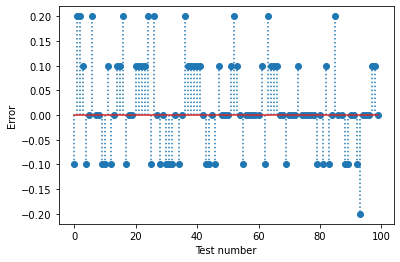

In [18]:
err = []
n_right = 0
for model in train_set:
    y_nn = predict(model)
    e = float(y_nn - model.y)
    if e == 0:
        n_right += 1
    err.append(e)
    
    #err.append(float(y_nn - model.y))

plt.clf()
markerline, stemlines, baseline = plt.stem(err, linefmt="C0:")
plt.setp(stemlines, "color", "C0")
plt.xlabel("Test number")
plt.ylabel("Error")
print('fraction of correct predictions = ', n_right / len(train_set))

#### Testing on an independent data set

fraction of correct predictions =  0.39


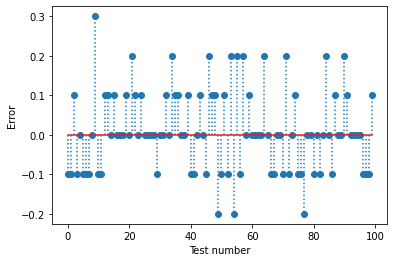

In [19]:
err = []
npts = 100
n_right = 0
for k in range(npts):
    model = ModelData()
    y_nn = predict(model)
    e = float(y_nn - model.y)
    if e == 0:
        n_right += 1
    err.append(e)

plt.clf()
markerline, stemlines, baseline = plt.stem(err, linefmt="C0:")
plt.setp(stemlines, "color", "C0")
plt.xlabel("Test number")
plt.ylabel("Error")
print('fraction of correct predictions = ', n_right / npts)

# Neural nework with hidden layers

### Signal processing example 

We are given a noisy signal (the noise is much higher amplitude than the signal) and we have to find out the frequency.
#### We did this with Fourier methods!

Define class object that can create many datasets with four possible frequencies to train and evaluate the performance of the neural network

In [20]:
# List of possible frequencies in the data
ALLOWED_FREQS = [1, 2, 3, 4]

class SignalData(object):
    """Produce model data as a cosine with one of the possible frequencies and pollute it
       with noise. The output is a "mask" array with 1 in the slot corresponding to the 
       correct frequency.
    """
    def __init__(self, N=100):
        self.N = N

        self.t = np.linspace(0.0, 1.0, N)

        # True frequency: chosen randomly from the possible values
        self.f = np.random.choice(ALLOWED_FREQS)

        # random numbers in (-1, 1)
        noise = 2.0*np.random.random(N) - 1.0

        # input data
        self.x_orig = np.cos(2.0*np.pi*self.f*self.t)
        self.x = self.x_orig + 5.0*noise
        
        # output (scaled)
        # array of zeros with "1" indicating the correct frequency
        self.y = np.zeros((len(ALLOWED_FREQS))) + 0.01
        self.y[self.f-1] = 1.0
        
    def interpret_frequency(self, out):
        """given the output from the neural network, determine which frequency
        was most preferred.
        """
        return ALLOWED_FREQS[np.argmax(out)]
        
    def fft_predict(self, do_plot=False):

        # the fft expects periodic data, so leave off the last point
        x = self.x[:-1]

        x_fft = np.fft.rfft(x)

        # power spectrum
        x_ps = np.abs(x_fft)**2

        # frequency bin centers in cycles per unit of the sample spacing
        k = np.fft.rfftfreq(len(x))
        # we need to divide by dt to make the frequencies dimensional 
        dt = self.t[1] - self.t[0]
        kfreq = k/dt

        idx = (np.where(x_ps == x_ps.max()))[0][0]

        if do_plot:
            fig = plt.figure( figsize=(3,2), dpi=150 )
            ax = fig.add_subplot(111)
            ax.set_xlabel('k')
            ax.set_ylabel('Power spectrum')
            ax.plot(kfreq, x_ps, color='black', ls='-',label="f = {}".format(self.f))
            ax.legend(fontsize=7)
            #plt.savefig('fft_ps.pdf',bbox_inches='tight')
            plt.show()
            plt.close()

        # return the dominant frequency
        return kfreq[idx]
    
    def round_to_allowed(self, y):
        """take the output and find which of the frequencies it is closest to
        """
        return min(ALLOWED_FREQS, key=lambda q:abs(q - y))

    def plot(self, oname="model_data.pdf"):
        """plot the signal data"""
        fig = plt.figure( figsize=(3,2), dpi=150 )
        ax = fig.add_subplot(111)
        ax.set_xlabel('time')
        ax.set_ylabel('X(t)')
        ax.scatter(self.t, self.x, color='blue', s=5)
        ax.plot(self.t, self.x_orig, color='orange', ls="--", label="f = {}".format(self.f))
        ax.legend(fontsize=7)
        #plt.savefig(oname,bbox_inches='tight')
        plt.show()
        plt.close()

Let's see a few examples of using the Fourier transform to infer the frequency of the signal 

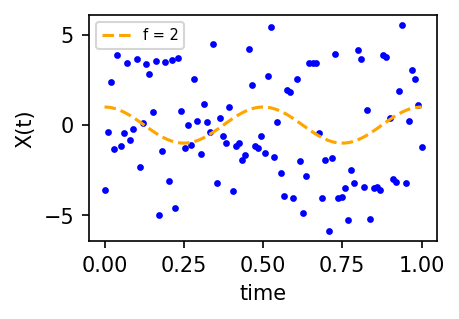

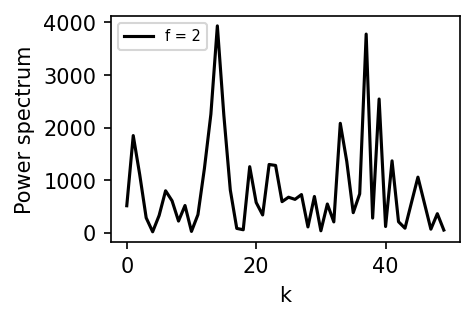

k_max = 14.000000000000002


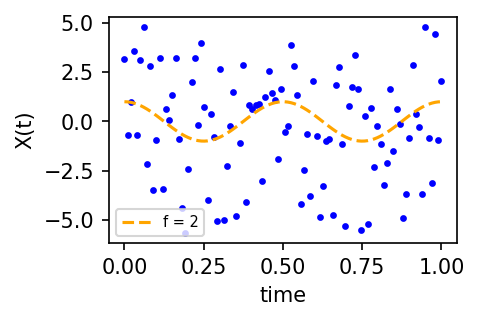

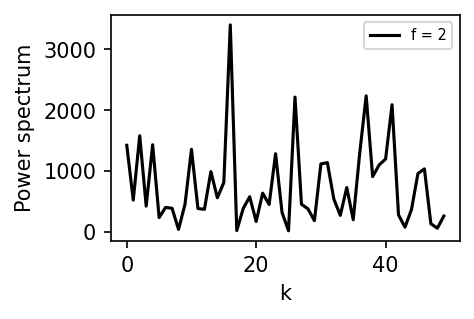

k_max = 16.0


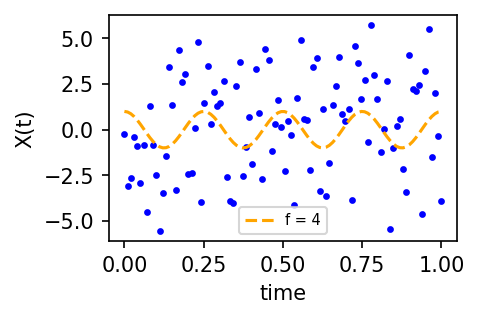

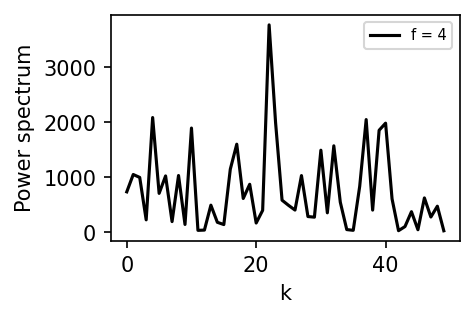

k_max = 22.0


In [21]:
for q in range(3):
    model = SignalData()
    model.plot()
    k_max = model.fft_predict(do_plot=True)
    print('k_max =',k_max)

Let's now create a neural network class with a single hidden layer to predict the frequency for a given input data

In [22]:
class NeuralNetwork(object):
    """A neural network class with a single hidden layer"""

    def __init__(self, num_training_unique=100, n_epochs=10,
                 learning_rate=0.1,
                 hidden_layer_size=100):

        self.num_training_unique = num_training_unique
        self.n_epochs = n_epochs

        # create the training data set
        self.train_set = []
        for _ in range(self.num_training_unique):
            self.train_set.append(SignalData())

        # learning rate
        self.eta = learning_rate

        # we get the size of the layers from the length of the input
        # and output
        model = self.train_set[0]

        # the number of nodes/neurons on the output layer
        self.m = len(model.y)

        # the number of nodes/neurons on the input layer
        self.n = len(model.x)

        # the number of nodes/neurons on the hidden layer
        self.k = hidden_layer_size

        # we will initialize the weights with Gaussian normal random
        # numbers centered on 0 with a width of 1/sqrt(n), where n is
        # the length of the input state

        # A is the set of weights between the hidden layer and output layer
        self.A = np.random.normal(0.0, 1.0/np.sqrt(self.k), (self.m, self.k))

        # B is the set of weights between the input layer and hidden layer
        self.B = np.random.normal(0.0, 1.0/np.sqrt(self.n), (self.k, self.n))

    def g(self, p):
        """our sigmoid function that operates on the hidden layer"""
        return 1.0/(1.0 + np.exp(-p))

    def train(self):
        """Train the neural network by doing gradient descent with back
        propagation to set the matrix elements in B (the weights
        between the input and hidden layer) and A (the weights between
        the hidden layer and output layer)

        """

        for i in range(self.n_epochs):

            print("epoch {} of {}".format(i+1, self.n_epochs))

            for _ in range(self.num_training_unique):

                model = np.random.choice(self.train_set)

                x = model.x.reshape(self.n, 1)
                y = model.y.reshape(self.m, 1)

                z_tilde = self.g(self.B @ x)
                z = self.g(self.A @ z_tilde)

                e = z - y
                e_tilde = self.A.T @ e

                dA = -2*self.eta * e * z*(1-z) @ z_tilde.T
                dB = -2*self.eta * e_tilde * z_tilde*(1-z_tilde) @ x.T

                self.A[:, :] += dA
                self.B[:, :] += dB

    def predict(self, model):
        """ predict the outcome using our trained matrix A """
        y = self.g(self.A @ (self.g(self.B @ model.x)))
        return y

And now define a function to train the neural network for given size of the hidden layer, and plot the results

In [23]:
def run_hidden_layer(k=2):

    # length of our input vector
    nn = NeuralNetwork(num_training_unique=1000, n_epochs=5, hidden_layer_size=k,
                       learning_rate=0.05)

    # train
    nn.train()
    
    # Test first on our original training set data
    results = {'model':[],'pred':[],'err':[],'pred_fftw':[],'err_fftw':[]}

    for q, model in enumerate(nn.train_set):
        
        # TRUE FREQUENCY
        results['model'].append(model.f)

        # NEURAL NETWORK
        y_nn = nn.predict(model)
        results['pred'].append(model.interpret_frequency(y_nn))
        results['err'].append(abs(model.interpret_frequency(y_nn) - model.f))
        
        # FFTW 
        k_max = model.fft_predict()
        k_max_allowed = model.round_to_allowed(k_max)
        results['pred_fftw'].append(k_max_allowed)
        results['err_fftw'].append(abs(k_max_allowed - model.f))
   
    fig = plt.figure( figsize=(3,2), dpi=150 )
    ax = fig.add_subplot(111)
    ax.set_xlabel('Error')
    ax.set_ylabel('Number of data sets')
    ax.set_title('Training set: k = %d' % k)
    ax.hist(results['err'],bins=np.arange(5)-0.5, label='Neural Network')
    ax.hist(results['err_fftw'],bins=np.arange(5)-0.5, histtype='step', color='orange', label='FFTW')
    ax.legend(loc='best', prop={'size':6})

    # Now test on 1000 different new random sequences
    results_test = {'model':[],'pred':[],'err':[],'pred_fftw':[],'err_fftw':[]}
    
    for _ in range(1000):
        model = SignalData()
        
        # TRUE FREQUENCY
        results_test['model'].append(model.f)

        # NEURAL NETWORK
        y_nn = nn.predict(model)
        results_test['pred'].append(model.interpret_frequency(y_nn))
        results_test['err'].append(abs(model.interpret_frequency(y_nn) - model.f))
        
        # FFTW 
        k_max = model.fft_predict()
        k_max_allowed = model.round_to_allowed(k_max)
        results_test['pred_fftw'].append(k_max_allowed)
        results_test['err_fftw'].append(abs(k_max_allowed - model.f))

    fig = plt.figure( figsize=(3,2), dpi=150 )
    ax = fig.add_subplot(111)
    ax.set_xlabel('Error')
    ax.set_ylabel('Number of data sets')
    ax.set_title('Test set: k = %d' % k)
    ax.hist(results_test['err'], bins=np.arange(5)-0.5, label='Neural Network')
    ax.hist(results_test['err_fftw'], bins=np.arange(5)-0.5, histtype='step', color='orange', label='FFTW')
    ax.legend(loc='best', prop={'size':6})
    
    print('\n ----- k = %d -----' % k)
    
    ind_nn = np.where(np.array(results_test['err']) == 0)[0]
    print('Neural Network: {:.2f}% correct predictions'.format(100.*ind_nn.size/len(results_test['err'])))
    ind_fftw = np.where(np.array(results_test['err_fftw']) == 0)[0]
    print('FFTW: {:.2f}% correct predictions'.format(100.*ind_fftw.size/len(results_test['err_fftw'])))
    
    return results_test

epoch 1 of 5
epoch 2 of 5
epoch 3 of 5
epoch 4 of 5
epoch 5 of 5

 ----- k = 2 -----
Neural Network: 43.40% correct predictions
FFTW: 51.10% correct predictions


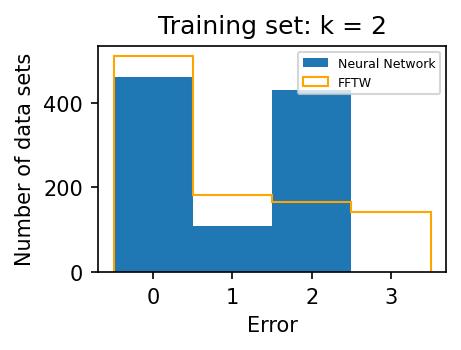

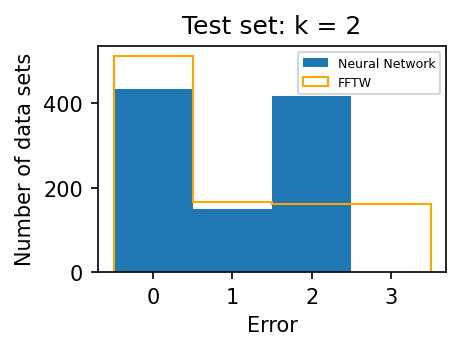

In [24]:
results_test = run_hidden_layer(k=2)

1
epoch 1 of 5
epoch 2 of 5
epoch 3 of 5
epoch 4 of 5
epoch 5 of 5

 ----- k = 1 -----
Neural Network: 29.50% correct predictions
FFTW: 49.00% correct predictions
2
epoch 1 of 5
epoch 2 of 5
epoch 3 of 5
epoch 4 of 5
epoch 5 of 5

 ----- k = 2 -----
Neural Network: 58.30% correct predictions
FFTW: 54.30% correct predictions
4
epoch 1 of 5
epoch 2 of 5
epoch 3 of 5
epoch 4 of 5
epoch 5 of 5

 ----- k = 4 -----
Neural Network: 78.20% correct predictions
FFTW: 51.50% correct predictions
8
epoch 1 of 5
epoch 2 of 5
epoch 3 of 5
epoch 4 of 5
epoch 5 of 5

 ----- k = 8 -----
Neural Network: 82.20% correct predictions
FFTW: 54.10% correct predictions
16
epoch 1 of 5
epoch 2 of 5
epoch 3 of 5
epoch 4 of 5
epoch 5 of 5

 ----- k = 16 -----
Neural Network: 81.40% correct predictions
FFTW: 52.20% correct predictions
32
epoch 1 of 5
epoch 2 of 5
epoch 3 of 5
epoch 4 of 5
epoch 5 of 5

 ----- k = 32 -----
Neural Network: 85.20% correct predictions
FFTW: 52.70% correct predictions
64
epoch 1 of 5
ep

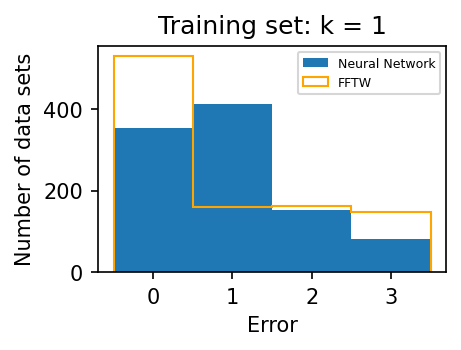

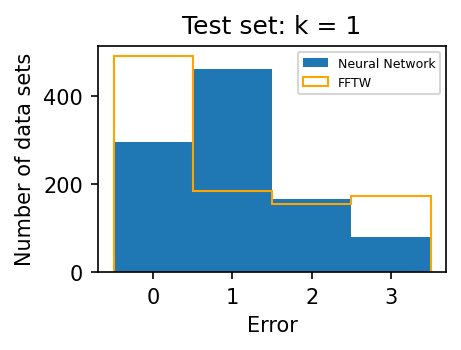

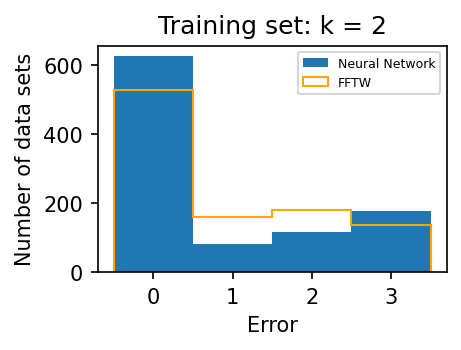

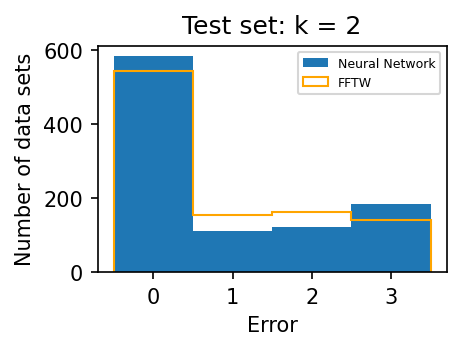

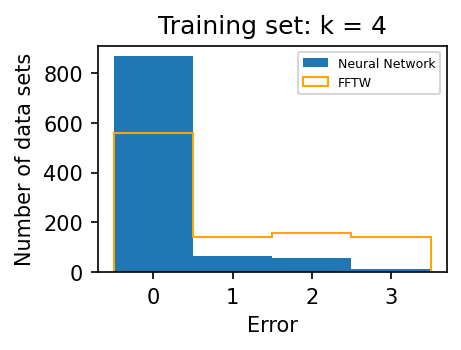

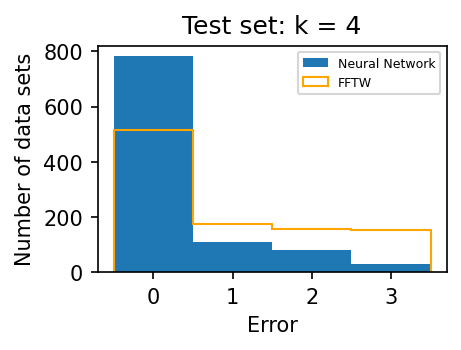

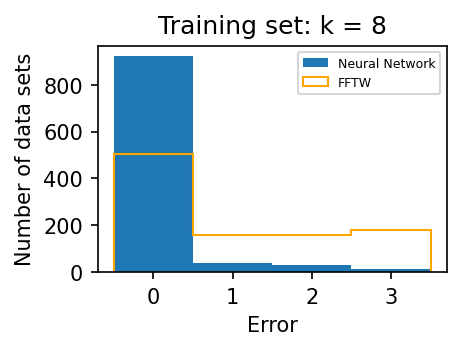

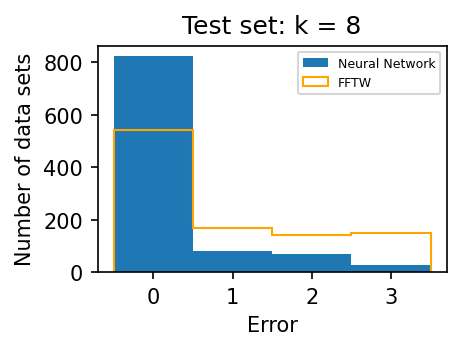

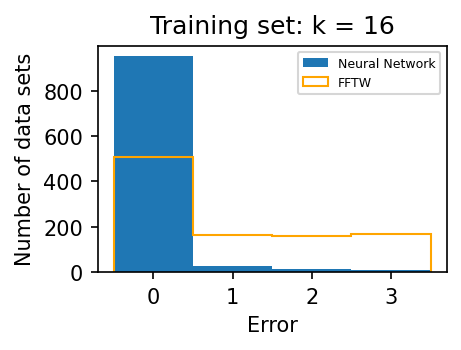

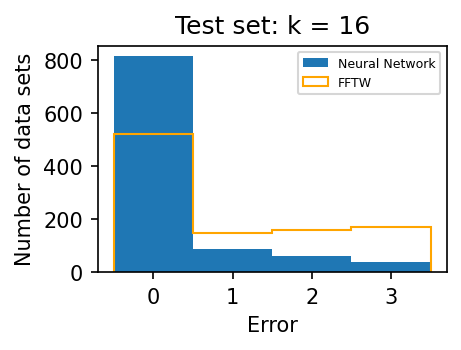

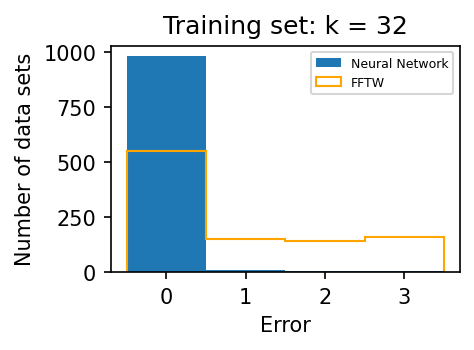

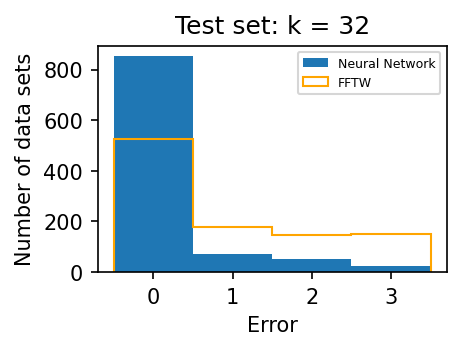

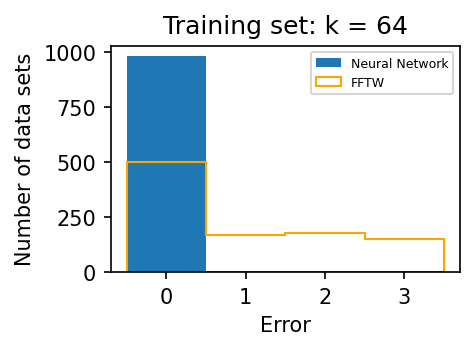

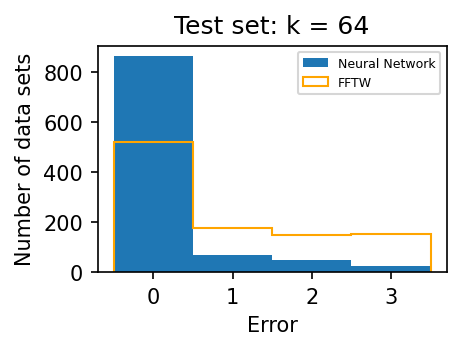

In [25]:
for hidden_size in [1, 2, 4, 8, 16, 32, 64]:
    print(hidden_size)
    run_hidden_layer(k=hidden_size)

### Implement a similar neural network using `MLPClassifier` from  `scikit-learn`

In [94]:
from sklearn.neural_network import MLPClassifier

Create training set in the format required by `sklearn`

In [101]:
# 1000 training samples, each with 100 data points from a noisy wave signal
X_train = np.zeros([1000,100])   
y_train = np.zeros([1000])
for i in range(1000):
    model = SignalData()
    X_train[i,:] = model.x
    y_train[i] = model.f

Initialize the classifier and train

In [96]:

clf = MLPClassifier(random_state=1, max_iter=1000,hidden_layer_sizes=(10))
clf.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=10, max_iter=1000, random_state=1)

Test with an independent data set

In [97]:
X_test = np.zeros([1000,100])
y_test = np.zeros([1000])
for i in range(1000):
    model = SignalData()
    X_test[i,:] = model.x
    y_test[i] = model.f

Evaluate the performance and make a plot!

In [102]:
y_pred = clf.predict(X_test)
err = np.abs(y_pred - y_test)

Neural Network: 82.10% correct predictions


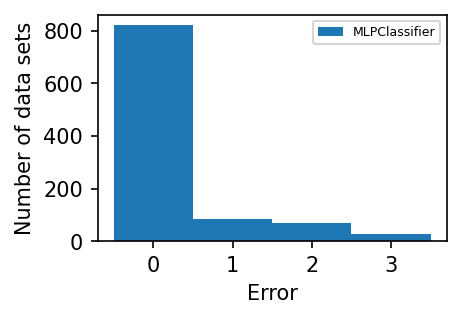

In [103]:
fig = plt.figure( figsize=(3,2), dpi=150 )
ax = fig.add_subplot(111)
ax.set_xlabel('Error')
ax.set_ylabel('Number of data sets')
#ax.set_title('Test set: k = %d' % k)
ax.hist(err, bins=np.arange(5)-0.5, label='MLPClassifier')
ax.legend(loc='best', prop={'size':6})

ind_nn = np.where(err == 0)[0]
print('Neural Network: {:.2f}% correct predictions'.format(100.*ind_nn.size/len(err)))

### And a different approach: using `RandomForestClassifier` from  `scikit-learn`

In [104]:
from sklearn.ensemble import RandomForestClassifier

Initialize the random forest classifier and train with the same data as the neural network

The same data and input/output struture in many `scikit-learn` functions!

In [105]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

And we are ready to test the predictions 

In [106]:
y_pred = model.predict(X_test)
err = np.abs(y_pred - y_test)

Random forest: 96.70% correct predictions


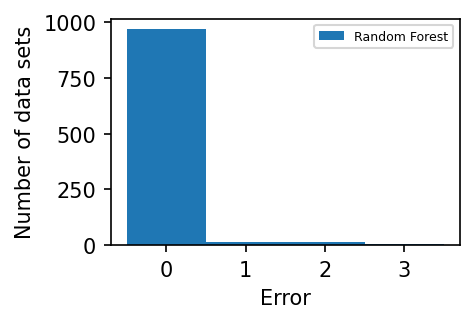

In [107]:
fig = plt.figure( figsize=(3,2), dpi=150 )
ax = fig.add_subplot(111)
ax.set_xlabel('Error')
ax.set_ylabel('Number of data sets')
#ax.set_title('Test set: k = %d' % k)
ax.hist(err, bins=np.arange(5)-0.5, label='Random Forest')
ax.legend(loc='best', prop={'size':6})

ind_forest = np.where(err == 0)[0]
print('Random forest: {:.2f}% correct predictions'.format(100.*ind_forest.size/len(err)))